In [8]:
!unzip '/content/daup.zip'

Archive:  /content/daup.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [10]:
import pandas as pd
k = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
k.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [11]:
#Check for missing values and handle them appropriately (e.g., imputation or removal).

k.isnull().sum()


,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [12]:
#Describe the dataset's key statistics (mean, median, standard deviation)
k.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Q2:

Time Series Visualization:

Plot the time series for all variables (e.g., daily mean temperature and precipitation).

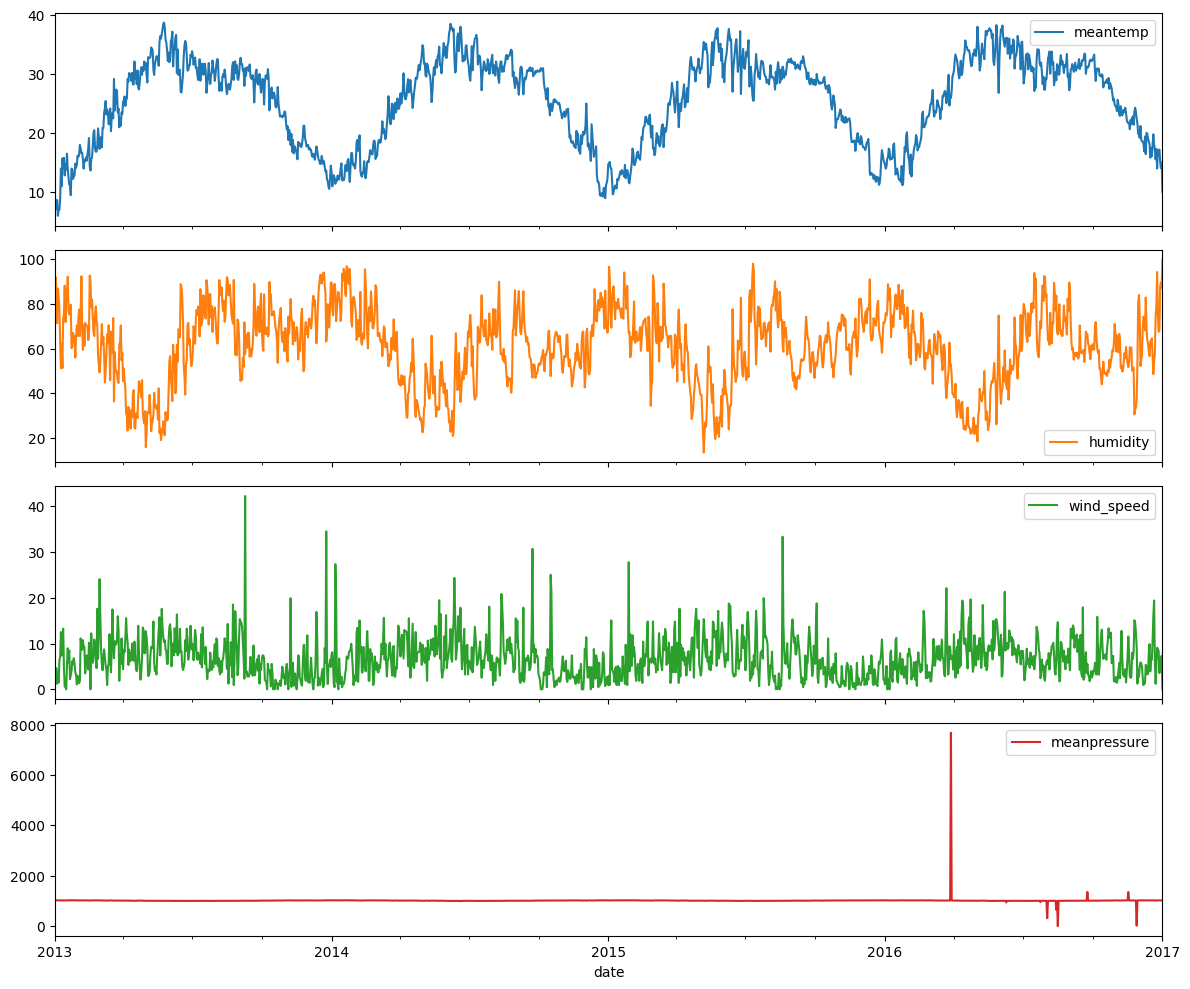

In [13]:
import matplotlib.pyplot as plt

# Assuming 'date' is your date column and needs to be converted to datetime
k['date'] = pd.to_datetime(k['date'])
k.set_index('date', inplace=True)

# Plotting all columns except 'date'
k.plot(subplots=True, figsize=(12, 10))
plt.tight_layout()
plt.show()

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


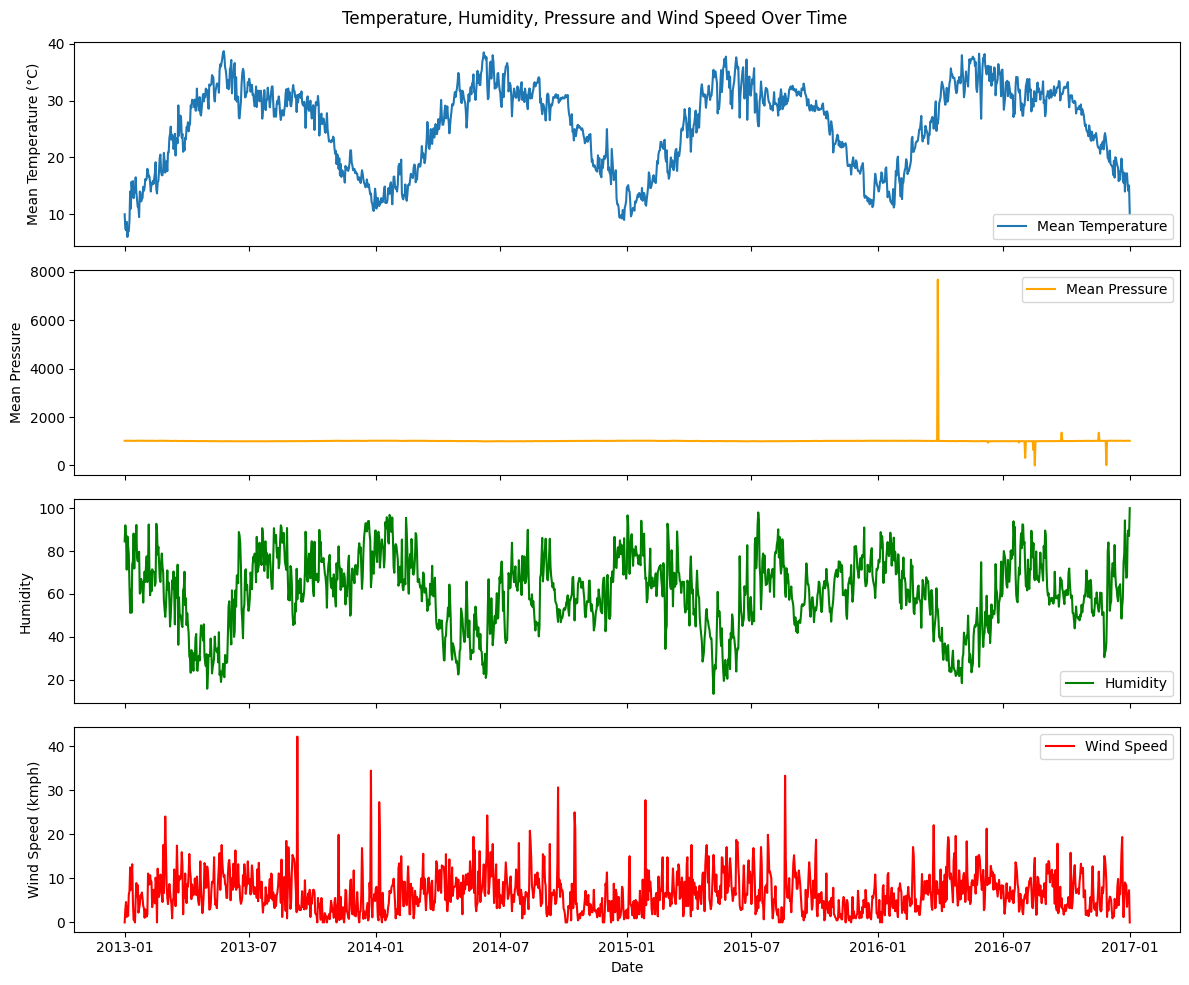

In [19]:
#Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.
import matplotlib.pyplot as plt

# Assuming 'k' is your DataFrame and 'date' is the index
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

# Plotting meantemp
axes[0].plot(k.index, k['meantemp'], label='Mean Temperature')
axes[0].set_ylabel('Mean Temperature (°C)')
axes[0].legend()

print(k.columns)  # Print the column names to identify the correct one

# Replace 'maxtemp' with the actual column name from the printed output
# In this case, it should be 'meanpressure', based on the Global variables information.
axes[1].plot(k.index, k['meanpressure'], label='Mean Pressure', color='orange')
axes[1].set_ylabel('Mean Pressure') # Update ylabel accordingly
axes[1].legend()

# Plotting mintemp #In this case, it should be 'humidity', based on the Global variables information.
axes[2].plot(k.index, k['humidity'], label='Humidity', color='green')
axes[2].set_ylabel('Humidity') # Update ylabel accordingly
axes[2].legend()

# Plotting wind_speed
axes[3].plot(k.index, k['wind_speed'], label='Wind Speed', color='red')
axes[3].set_ylabel('Wind Speed (kmph)')
axes[3].legend()

plt.xlabel('Date')
plt.suptitle('Temperature, Humidity, Pressure and Wind Speed Over Time') # Update title
plt.tight_layout()
plt.show()

Q3] Seasonality and Trends:

Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.

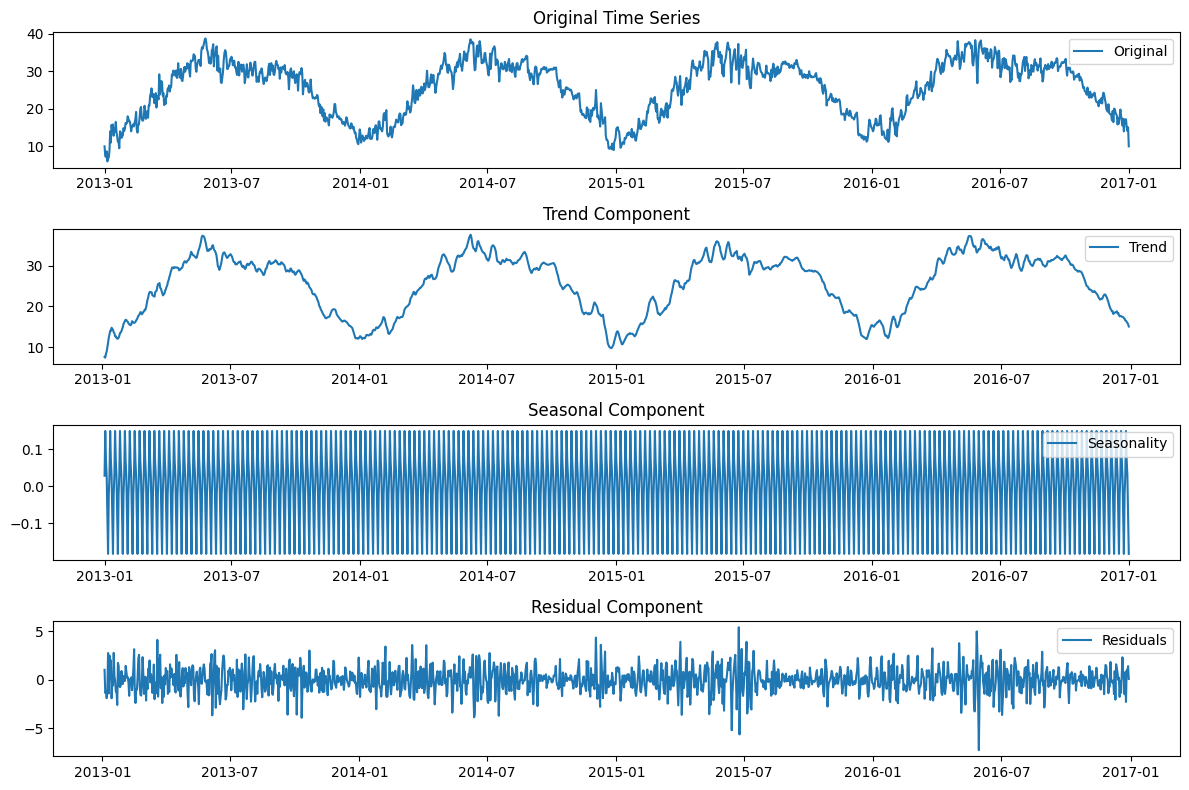

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'k' is your DataFrame and 'meantemp' is the column for mean temperature
decomposition = sm.tsa.seasonal_decompose(k['meantemp'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components with labels
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(k.index, k['meantemp'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')  # Add title for the first subplot

plt.subplot(412)
plt.plot(k.index, trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')  # Add title for the second subplot

plt.subplot(413)
plt.plot(k.index, seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')  # Add title for the third subplot

plt.subplot(414)
plt.plot(k.index, residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residual Component')  # Add title for the fourth subplot

plt.tight_layout()
plt.show()

In [ ]:
#Analyze the 'seasonal' component plot for repeating peaks and troughs, indicating seasonal variations.
#Interpret the significance based on pattern amplitude and regularity.
#Relate patterns to real-world phenomena like expected seasonal temperature changes.
#By understanding seasonal patterns, you can gain valuable insights into daily mean temperature behavior
#and its potential impacts.

In [21]:
#Q4:
#Select one variable (e.g., daily mean temperature) for forecasting.

# Assuming 'k' is your DataFrame
temperature_data = k['meantemp']
print(temperature_data)

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'k' is your original DataFrame
# Split the data into training and testing sets
train_data, test_data = train_test_split(k, test_size=0.2, shuffle=False)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1169, 4)
Testing data shape: (293, 4)


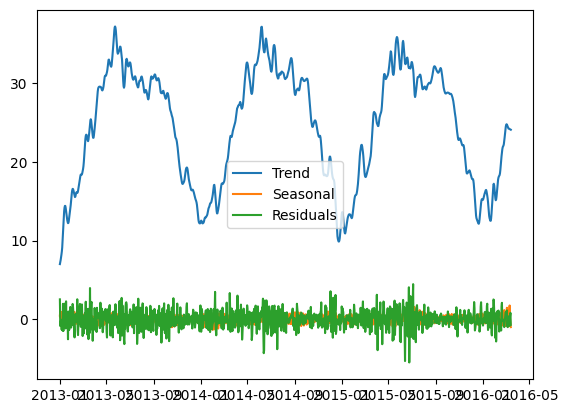

In [30]:
#Fit Seasonal Decomposition of Time Series (STL) model to the training set.
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
#k is training data
# Fit the STL model to the training data, but use only the 'meantemp' column
stl = STL(train_data['meantemp'], seasonal=13)  # Adjust seasonal period if needed
result = stl.fit()

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Visualize the components (optional)
plt.plot(trend, label='Trend')
plt.plot(seasonal, label='Seasonal')
plt.plot(resid, label='Residuals')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 6.728980921670972
Root Mean Squared Error (RMSE): 8.225269735647533


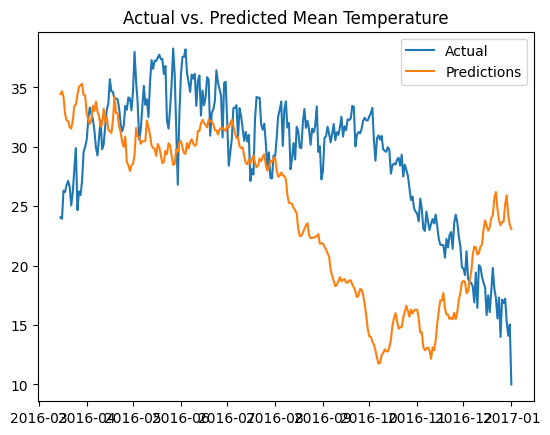

In [31]:
# 3. Make predictions on the test data
predictions = result.trend[-len(test_data):] + result.seasonal[-len(test_data):]

# 4. Calculate MAE and RMSE
mae = mean_absolute_error(test_data['meantemp'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# (Optional) Visualize the predictions against actual values
plt.plot(test_data.index, test_data['meantemp'], label='Actual')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.title('Actual vs. Predicted Mean Temperature')
plt.show()